# Recent grads data practice

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4626.000000,2200.000000,1784.000000,0.339671,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15150.000000,5521.000000,8489.000000,0.535714,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,39107.000000,15204.000000,22847.000000,0.707136,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
print(recent_grads.shape[0])
recent_grads = recent_grads.dropna()
print(recent_grads.shape[0])

173
172


## Scatter matrix using method
- from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cfb99b668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6cfb89b710>]], dtype=object)

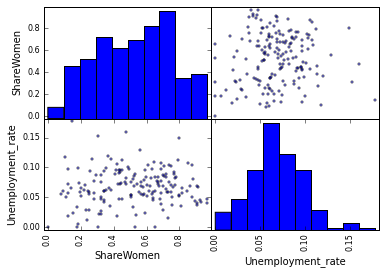

In [5]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen",'Unemployment_rate']])

## Scatter matrix using multiple subplots

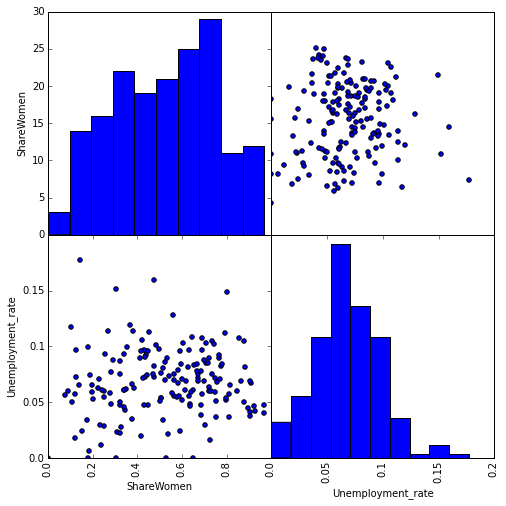

In [6]:
# instantiate figure and subplots
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# fill in data
ax1.hist(recent_grads['ShareWomen'])
ax2.scatter(recent_grads['Unemployment_rate'],recent_grads['ShareWomen'])
ax3.scatter(recent_grads['ShareWomen'],recent_grads['Unemployment_rate'])
ax4.hist(recent_grads['Unemployment_rate'])

# disable the xlabel for the top 2 subplots
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)

# set the labels
ax1.set_ylabel('ShareWomen')
ax3.set_xlabel('ShareWomen')
ax3.set_ylabel('Unemployment_rate')
ax4.set_xlabel('Unemployment_rate')

# set the limits
ax1.set_xlim([0,1])
ax2.set_xlim([0.0,0.2])
ax3.set_xlim([0.0,1.0])
ax3.set_ylim([0.0,0.2])
ax4.set_xlim([0.0,0.2])

ax1.set_yticklabels([0,5,10,15,20,25,30])
ax3.set_yticklabels([0.,.05,.10,.15])
ax3.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax4.set_xticklabels([0.0, 0.05, 0.1, 0.15, 0.2], rotation=90)


# adjust the spacing to be zero between the plots
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Grouped bar plot

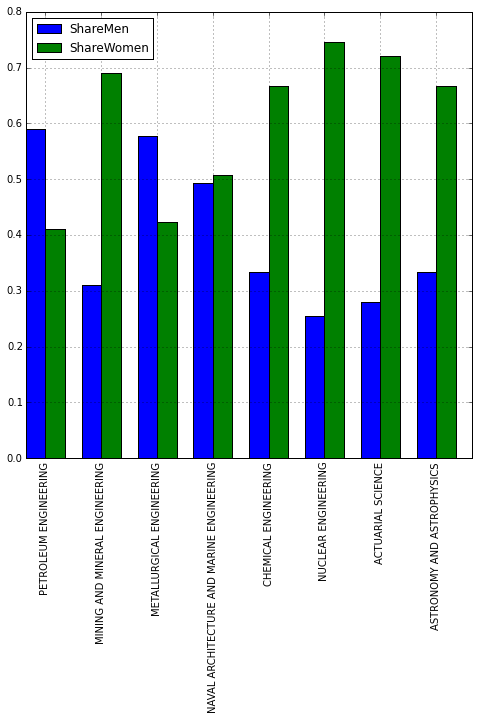

In [7]:
# Find people majoring in Art
recent_grads['ShareMen']=recent_grads['Men']/recent_grads['Total']
isart = recent_grads['Major_category']=='Arts'
arts = recent_grads[recent_grads['Major_category'] == 'Arts']
arts.set_index('Major', inplace=True)

# There are 8 types of sub majors in the caterogy art
# location index is 0 through 7
locs = np.arange(8)
# offset is to plot the 2nd bar graph, offsetted by the bar thickness
offset_locs = locs+0.35

# create instance
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
# ax.bar takes left, heigh, width as input
bar_1=ax1.bar(left=locs, height=recent_grads[isart]['ShareMen'].tolist(), width=0.35)
bar_2=ax1.bar(left=offset_locs, height=recent_grads[isart]['ShareWomen'].tolist(), width=0.35, color='green')
# label the x axis, instead of 0 through 7
ax1.set_xticklabels(recent_grads['Major'].tolist(), rotation=90)
# place the label on the left side of the 2nd bar location
ax1.set_xticks(offset_locs)

plt.legend((bar_1,bar_2),('ShareMen','ShareWomen'), loc='upper left')
plt.grid()
plt.show()
#arts[['ShareMen','ShareWomen']].plot(kind='bar')

## Additional practice

### Visualizing Gender ratio

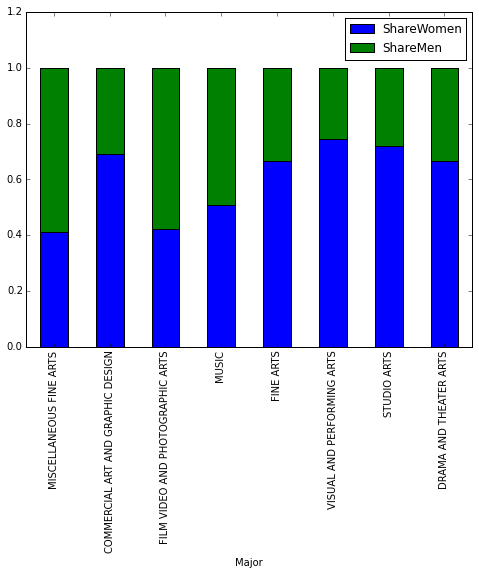

In [23]:
columns=['ShareWomen','ShareMen']

arts = recent_grads[recent_grads['Major_category'] == 'Arts']
arts.set_index('Major', inplace=True)
gender=arts[columns]
gender.plot(kind='bar', stacked=True, figsize=(8,6))